In [0]:
# 导入工具包 numpy pandas用于数据处理  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline
#装载云盘
from google.colab import drive
drive.mount('/content/drive')
#4/0gHxpylaIQXqH0HMsq7IH5BzCcKvy9_huS2T9c5C6hr3clC7Odx_qIQ

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#读取数据
#不用的特征
#nouse=['area_id','user_id','prov_id','total_times','sex','is_act_expire','call_days','short_call10','long_call10','bank_cnt']
nouse=['area_id','user_id','prov_id']
#nouse=['is_home_5g_cover_l02','activity_type','is_act_expire','call_days','re_call10','long_call10',
# 'active_days02','active_days03','active_days04','active_days05','active_days06','active_days07',
# 'active_days08','active_days10','active_days12','active_days13','active_days14','active_days17',
# 'active_days18','active_days19','active_days20','active_days21','active_days22','active_days23']+nouse
#use=['sex']
#自己筛选了一些特征
df = pd.read_csv('/content/drive/My Drive/colab/5G_contest/train.csv')
df = shuffle(df)
train=df.iloc[0:600000,]
test=df.iloc[600000:,]
train=train.dropna()#删除缺失值
train=train.sort_values(by='is_5g',ascending=False)#按照is_5g排序
cut=int(sum(train['is_5g']))
train=train.iloc[:2*cut,:]#选取前2*cut行
#划分特征 与 标签 展现下数据形状
y_train=train['is_5g']
x_train=train.iloc[:,:-1]
x_train=x_train.drop(nouse,axis=1)
#进行数据归一化
min_max_scaler = preprocessing.MinMaxScaler()
x_train01=min_max_scaler.fit_transform(x_train)
x_train= pd.DataFrame(x_train01,columns=x_train.columns)
#x_train=x_train[use]
x_train=x_train.values
y_train=y_train.values
x_train.shape,y_train.shape

((15948, 56), (15948,))

In [0]:
#读取测试集
test=test.dropna()
#划分特征 与 标签 展现下数据形状
y_test=test['is_5g']
x_test=test.iloc[:,:-1]
x_test=x_test.drop(nouse,axis=1)
#x_test=x_test[use]
#进行数据归一化
min_max_scaler = preprocessing.MinMaxScaler()
x_test01=min_max_scaler.fit_transform(x_test)
x_test= pd.DataFrame(x_test01,columns=x_test.columns)
x_test=x_test.values
y_test=y_test.values
x_test.shape,y_test.shape

((100000, 56), (100000,))

In [0]:
from sklearn.feature_selection import RFE
#使用adaboost分类算法
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=0)
selector = RFE(model, 30, step=2)
selector = selector.fit(x_train, y_train)

In [0]:
summary = np.zeros(sum(selector.support_)).tolist()
j=0
k=0
for i in selector.support_:
    j=j+1
    if i==True:
        summary[k]=j-1
        k=k+1
summary

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [0]:
x_test=x_test[:,summary]
x_train=x_train[:,summary]

[-9.32886645e-03  2.93340811e-03 -1.48094162e-02  3.06997119e-01
  1.11808431e-01  3.11283205e+00  0.00000000e+00 -0.00000000e+00
 -1.95976941e-02  1.37641808e-01  0.00000000e+00  1.35027935e-02
  1.88584759e-03 -0.00000000e+00  1.14250848e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  2.39284873e-02 -2.51263234e-01
  0.00000000e+00  1.61004434e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.68821067e-03  2.86794576e-03 -0.00000000e+00  2.70409923e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.51727838e-02
  2.15099343e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.34655259e-01  0.00000000e+00  1.76657649e-02  1.08061729e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  4.53238471e-01
 -9.58658099e-02]


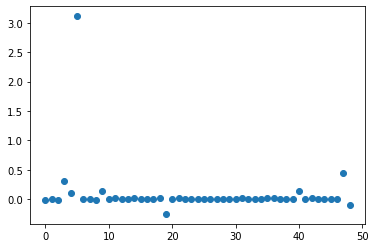

In [0]:
#特征选择 
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.001)
lasso.fit(x_train, y_train)
print(lasso.coef_)
plt.plot(lasso.coef_,'o', label = 'regression')
index=lasso.coef_>0
coef=[int(i) for i in index]
x_train=x_train*coef
x_test=x_test*coef

In [0]:
#降维
x_train=pd.DataFrame(x_train)
x_train=x_train.loc[:, (x_train != 0).any(axis=0)]#删除全0列
x_train=x_train.values
x_test=pd.DataFrame(x_test)
x_test=x_test.loc[:, (x_test != 0).any(axis=0)]#删除全0列
x_test=x_test.values
len(x_test[1,:])

19

In [0]:
train_data,test_data, train_labels, test_labels=x_train,x_test,y_train,y_test
#随机森林方法
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(train_data,train_labels)
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))


测试集:
预测正确数量,测试集样本量:
73042 100000
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84     98701
         1.0       0.04      0.85      0.08      1299

    accuracy                           0.73    100000
   macro avg       0.52      0.79      0.46    100000
weighted avg       0.98      0.73      0.83    100000

混淆矩阵：
[[71943 26758]
 [  200  1099]]


In [0]:
#logistic回归
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0,l1_ratio=0.01)
model.fit(train_data,train_labels)
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


测试集:
预测正确数量,测试集样本量:
78371 100000
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      0.78      0.88     98701
         1.0       0.04      0.71      0.08      1299

    accuracy                           0.78    100000
   macro avg       0.52      0.75      0.48    100000
weighted avg       0.98      0.78      0.87    100000

混淆矩阵：
[[77451 21250]
 [  379   920]]


In [0]:
#使用adaboost分类算法
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(train_data,train_labels)
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

测试集:
预测正确数量,测试集样本量:
77659 100000
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      0.78      0.87     98701
         1.0       0.05      0.83      0.09      1299

    accuracy                           0.78    100000
   macro avg       0.52      0.80      0.48    100000
weighted avg       0.98      0.78      0.86    100000

混淆矩阵：
[[76579 22122]
 [  219  1080]]


In [0]:
#梯度提升分类
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier(random_state=123)
model.fit(train_data,train_labels)
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

测试集:
预测正确数量,测试集样本量:
78674 100000
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88     98701
         1.0       0.05      0.85      0.09      1299

    accuracy                           0.79    100000
   macro avg       0.52      0.82      0.49    100000
weighted avg       0.99      0.79      0.87    100000

混淆矩阵：
[[77574 21127]
 [  199  1100]]


In [0]:
#神经网络分类方法
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(train_data,train_labels)
print("测试集:")
predict_target2=model.predict(test_data)
print("预测正确数量,测试集样本量:")
print(sum(predict_target2 == test_labels),len(test_labels))
print("精确度等指标：")
print(metrics.classification_report(test_labels,predict_target2))
print("混淆矩阵：")
print(metrics.confusion_matrix(test_labels,predict_target2))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


测试集:
预测正确数量,测试集样本量:
77748 100000
精确度等指标：
              precision    recall  f1-score   support

         0.0       1.00      0.78      0.87     98699
         1.0       0.05      0.84      0.09      1301

    accuracy                           0.78    100000
   macro avg       0.52      0.81      0.48    100000
weighted avg       0.98      0.78      0.86    100000

混淆矩阵：
[[76661 22038]
 [  214  1087]]
